In [6]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sys
sys.path.insert(0,"/home/albert/Work/git/cmclimate")
import cmclimate
import os
%matplotlib inline
matplotlib.rcParams['figure.figsize']= (20, 8)
matplotlib.rcParams['xtick.labelsize']= 22
matplotlib.rcParams['ytick.labelsize']= 22
matplotlib.rcParams['axes.labelsize']= 22
matplotlib.rcParams.update({'font.size': 22})

import sys
sys.path.insert(0,"/home/albert/lib/python")
import numpy as np
import xarray as xr
import GriddedData
import time
import numpy.ma as ma

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


In [7]:
## magics

%load_ext version_information 
%version_information numpy,xarray,netCDF4,matplotlib


The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


Software versions
Python 2.7.15 64bit [GCC 7.3.0]
IPython 4.2.0
OS Linux 3.16.0 6 amd64 x86_64 with debian 8.11
numpy 1.14.2
xarray 0.10.4
netCDF4 1.4.0
matplotlib 2.2.2
Thu Dec 13 17:05:35 2018 CET

In [8]:
ds_hgradT_JFM=xr.open_dataset('/mnt/albert/equipes/meom/workdir/albert/TSG/ALL_temperature_gradients_1x1.nc')
ds_hgradS_JFM=xr.open_dataset('/mnt/albert/equipes/meom/workdir/albert/TSG/ALL_salinity_gradients_1x1.nc')
ds_hgradb_JFM=xr.open_dataset('/mnt/albert/equipes/meom/workdir/albert/TSG/ALL_buoyancy_gradients_1x1.nc')


In [9]:
nobsT_JFM=ds_hgradT_JFM['nobs']
nobsS_JFM=ds_hgradS_JFM['nobs']
nobsb_JFM=ds_hgradb_JFM['nobs']


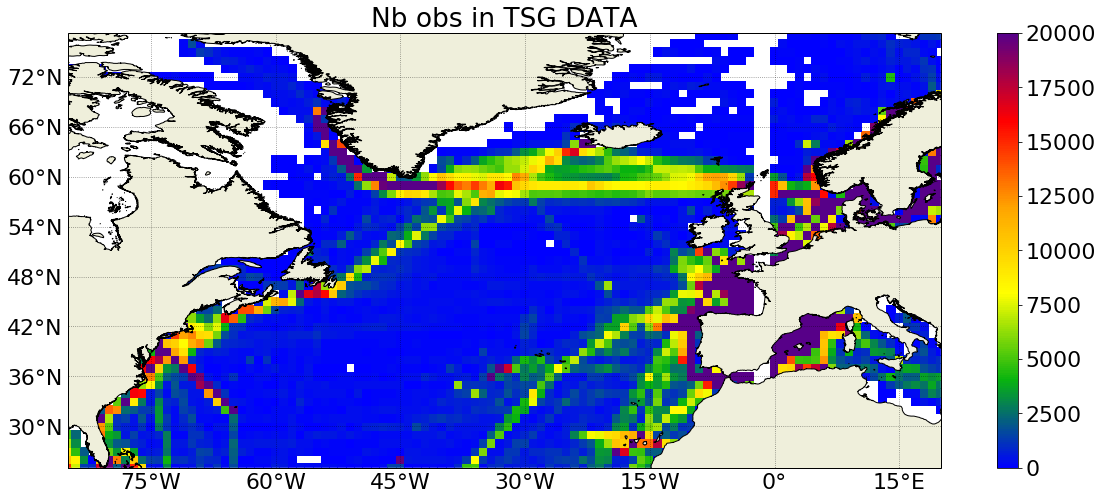

In [10]:
fig=plt.figure(figsize=(20,8))
data=ma.masked_invalid(nobsT_JFM)
lon=ds_hgradT_JFM['lon']
lat=ds_hgradT_JFM['lat']

ax = plt.subplot(1, 1, 1,projection=ccrs.PlateCarree(central_longitude=0))
lon_min=-85
lon_max=20
lat_min=25
lat_max=70
extent=(lon_min, lon_max, lat_min, lat_max)
ax.set_extent((-85, 20, 25, 70))
land = cfeature.GSHHSFeature(scale='intermediate',
                                 levels=[1],
                                 facecolor=cfeature.COLORS['land'])
ax.add_feature(land)
gl = ax.gridlines(draw_labels=True, linestyle=':', color='black',
                      alpha=0.5)
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax.tick_params('both',labelsize=22)
plt.pcolormesh(lon,lat,data,cmap=cmclimate.cm.BlGrYeOrReVi200, vmin=0, vmax=20000)
plt.colorbar()
plt.title('Nb obs in TSG DATA')
plt.savefig('Nb_data_year_1x1.png', dpi=200, bbox_inches='tight')